In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0316).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 3.5*10**(-13)*np.exp(430/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 1.63*10**(-10)*np.exp(60/data['tas'])

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 9.5*10**(-14)*np.exp(390/data['tas'])

In [5]:
data['a'] = 2*data['k_ch3o2_ch3o2']
data['b'] = data['k_no_ch3o2']*data['no_mole']
data['c'] = -data['lossch4_mole']

In [6]:
data['ch3o2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [7]:
data['ratio_ch3o2_oh'] = data['ch3o2_mole']/data['oh_mole']
data['ratio_ch3o2_oh'].describe()

count    972000.000000
mean       1687.628606
std        7027.443918
min           0.002401
25%          25.892841
50%         124.718817
75%         350.041226
max      192483.887553
Name: ratio_ch3o2_oh, dtype: float64

In [8]:
data['P2'] = data['k_no_ch3o2']*data['no_mole']*data['ch3o2_mole']
data['P2_frac'] = data['P2']/data['o3prod_mole']
data['P2_frac'].describe()

count    972000.000000
mean          0.474914
std           0.475960
min           0.002488
25%           0.179191
50%           0.417904
75%           0.692643
max          62.306313
Name: P2_frac, dtype: float64

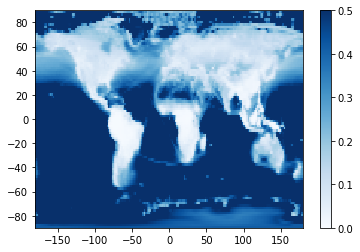

In [9]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [10]:
data_mean['P2_frac'].describe()

count    16200.000000
mean         0.474914
std          0.316722
min          0.004239
25%          0.194751
50%          0.446854
75%          0.715565
max          3.815426
Name: P2_frac, dtype: float64

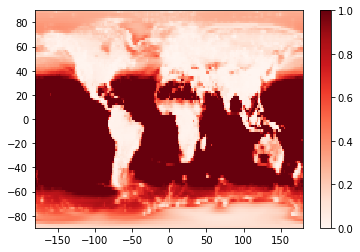

In [11]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ch3o2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=1, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [12]:
data['P3'] = data['o3prod_mole'] - data['P1'] - data['P2']
data['P3_frac'] = data['P3']/data['o3prod_mole']
data['P3_frac'].describe()

count    972000.000000
mean          0.137174
std           0.523159
min         -63.470975
25%          -0.107652
50%           0.156918
75%           0.409877
max           0.990821
Name: P3_frac, dtype: float64

In [25]:
data['k_no_ro2'] = 2.54*10**(-12)*np.exp(360/data['tas'])
data['ro2_mole'] = data['P3']/data['k_no_ro2']/data['no_mole']
data['ro2_mole'].describe()

count    9.720000e+05
mean    -5.288529e+06
std      1.035074e+08
min     -5.890217e+08
25%     -1.469454e+07
50%      3.111534e+06
75%      2.784910e+07
max      1.253907e+09
Name: ro2_mole, dtype: float64

In [26]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     8.845792e+07
std      9.758661e+07
min      4.667673e-01
25%      7.867536e+06
50%      5.037379e+07
75%      1.424472e+08
max      6.021570e+08
Name: ho2_mole, dtype: float64

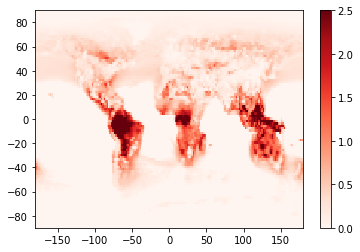

In [27]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ro2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [15]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [16]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [17]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    972000.000000
mean          1.633369
std           2.033231
min           0.002895
25%           0.532406
50%           1.069011
75%           2.142267
max         134.399669
Name: ratio_P1_P2, dtype: float64

In [18]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    972000.000000
mean          2.574864
std          15.660226
min           0.008336
25%           0.158606
50%           0.265355
75%           0.661963
max        1340.643521
Name: ratio_P5_P6, dtype: float64

In [19]:
data = data.drop(['a','b','c','country_y'], axis=1)
data = data.rename(columns={'country_x':'country'})
data

longitude  latitude     t     loc            o3        o3prod  \
0             1.0     -89.0   1.0   911.0  1.589701e-08  8.802798e-14   
1             3.0     -89.0   1.0  2911.0  1.590375e-08  8.794498e-14   
2             5.0     -89.0   1.0  4911.0  1.591221e-08  8.791484e-14   
3             7.0     -89.0   1.0  6911.0  1.594265e-08  8.803169e-14   
4             9.0     -89.0   1.0  8911.0  1.596177e-08  8.795628e-14   
...           ...       ...   ...     ...           ...           ...   
971995       -9.0      89.0  60.0 -8911.0  1.630996e-08  2.842892e-16   
971996       -7.0      89.0  60.0 -6911.0  1.632853e-08  2.287422e-16   
971997       -5.0      89.0  60.0 -4911.0  1.634956e-08  1.920444e-16   
971998       -3.0      89.0  60.0 -2911.0  1.636259e-08  2.303925e-16   
971999       -1.0      89.0  60.0  -911.0  1.638008e-08  3.034051e-16   

              o3loss        eminox        emivoc        tas  ...  \
0       9.406584e-14  0.000000e+00  0.000000e+00  249.57623  ...   
1       9.389479e-14  0.000000e+00  0.000000e+00  249.54080  ...   
2       9.379763e-14  0.000000e+00  0.000000e+00  249.50958  ...   
3       9.397011e-14  0.000000e+00  0.000000e+00  249.49193  ...   
4       9.384050e-14  0.000000e+00  0.000000e+00  249.46387  ...   
...              ...           ...           ...        ...  ...   
971995  1.809345e-16  3.336417e-13  6.572778e-15  242.57967  ...   
971996  1.680337e-16  1.499039e-13  2.951658e-15  242.59355  ...   
971997  1.595247e-16  1.640803e-14  3.207111e-16  242.60947  ...   
971998  1.698968e-16  3.794615e-14  7.451860e-16  242.61600  ...   
971999  1.917071e-16  2.266782e-13  4.464733e-15  242.62566  ...   

                  P3   P3_frac      k_no_ro2      ro2_mole            P5  \
0      -16509.828473 -0.311445  1.074681e-11 -2.065661e+07  11987.364548   
1      -16471.822530 -0.311021  1.074901e-11 -2.058355e+07  11984.722511   
2      -16436.158716 -0.310454  1.075095e-11 -2.051713e+07  11985.175218   
3      -16479.309553 -0.310856  1.075205e-11 -2.054259e+07  12026.277957   
4      -16450.644939 -0.310581  1.075380e-11 -2.048288e+07  12037.339682   
...              ...       ...           ...           ...           ...   
971995     98.217212  0.573702  1.120335e-11  8.174790e+04      2.256674   
971996     82.281734  0.597333  1.120240e-11  1.130398e+05      2.246048   
971997     75.087140  0.649267  1.120131e-11  1.822416e+05      2.228837   
971998     86.820913  0.625771  1.120086e-11  1.470090e+05      2.315283   
971999    105.579380  0.577851  1.120020e-11  9.140011e+04      2.404540   

         P5_frac            P6   P6_frac  ratio_P1_P2  ratio_P5_P6  
0       0.211617  35541.184175  0.627421     1.287908     0.337281  
1       0.211956  35489.851754  0.627656     1.289965     0.337694  
2       0.212184  35461.143407  0.627798     1.291600     0.337981  
3       0.212520  35550.656528  0.628228     1.292746     0.338286  
4       0.213010  35532.988023  0.628783     1.294496     0.338765  
...          ...           ...       ...          ...          ...  
971995  0.020711     36.085798  0.331188     4.168988     0.062536  
971996  0.022196     43.289346  0.427803     3.355159     0.051885  
971997  0.023201     51.500816  0.536100     2.430410     0.043278  
971998  0.022630     48.783566  0.476812     3.014331     0.047460  
971999  0.020828     39.746725  0.344288     4.118898     0.060497  

[972000 rows x 73 columns]

In [20]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0317).csv', index = False)

In [21]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [22]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.33
P2 fraction:    0.24
P3 fraction:    0.43
P5 fraction:    0.13
P6 fraction:    0.3
P1:P2 ratio:    2.13
P5:P6 ratio:    0.84
HO₂:OH ratio:   40.0
CH₃O₂:OH ratio: 16.9
